<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/Final_Project_ML2_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT FOR TEAM
---
Kaggle Summary – Credit Card Fraud Detection Dataset

* Instances: 284,807 transactions

* Features: 30 total (28 PCA features + Time, Amount)

* Target: Class (1 = Fraud, 0 = Not Fraud)

* Data Type: All numerical

* Fraud Rate: 0.172% (492 frauds)

#**Libraries**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
C_card = pd.read_csv("creditcard.csv")



#**Loading The Data**

In [ ]:
# import kagglehub
# from kagglehub import KaggleDatasetAdapter

# file_path = "creditcard.csv"

# C_card = kagglehub.load_dataset(
#   KaggleDatasetAdapter.PANDAS,
#   "mlg-ulb/creditcardfraud",
#   file_path)

##**Dataset Understanding**

In [ ]:
#Data types overview

C_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
C_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 **Note**  :  ***V1 - V28***  are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

#**Data preprocessing and feature engineering**

In [ ]:
# Remove irrelevant feature

C_card = C_card.drop(['Time'] , axis = 1)

In [ ]:
#split the data
x = C_card.drop(['Class'], axis=1)
y = C_card['Class']

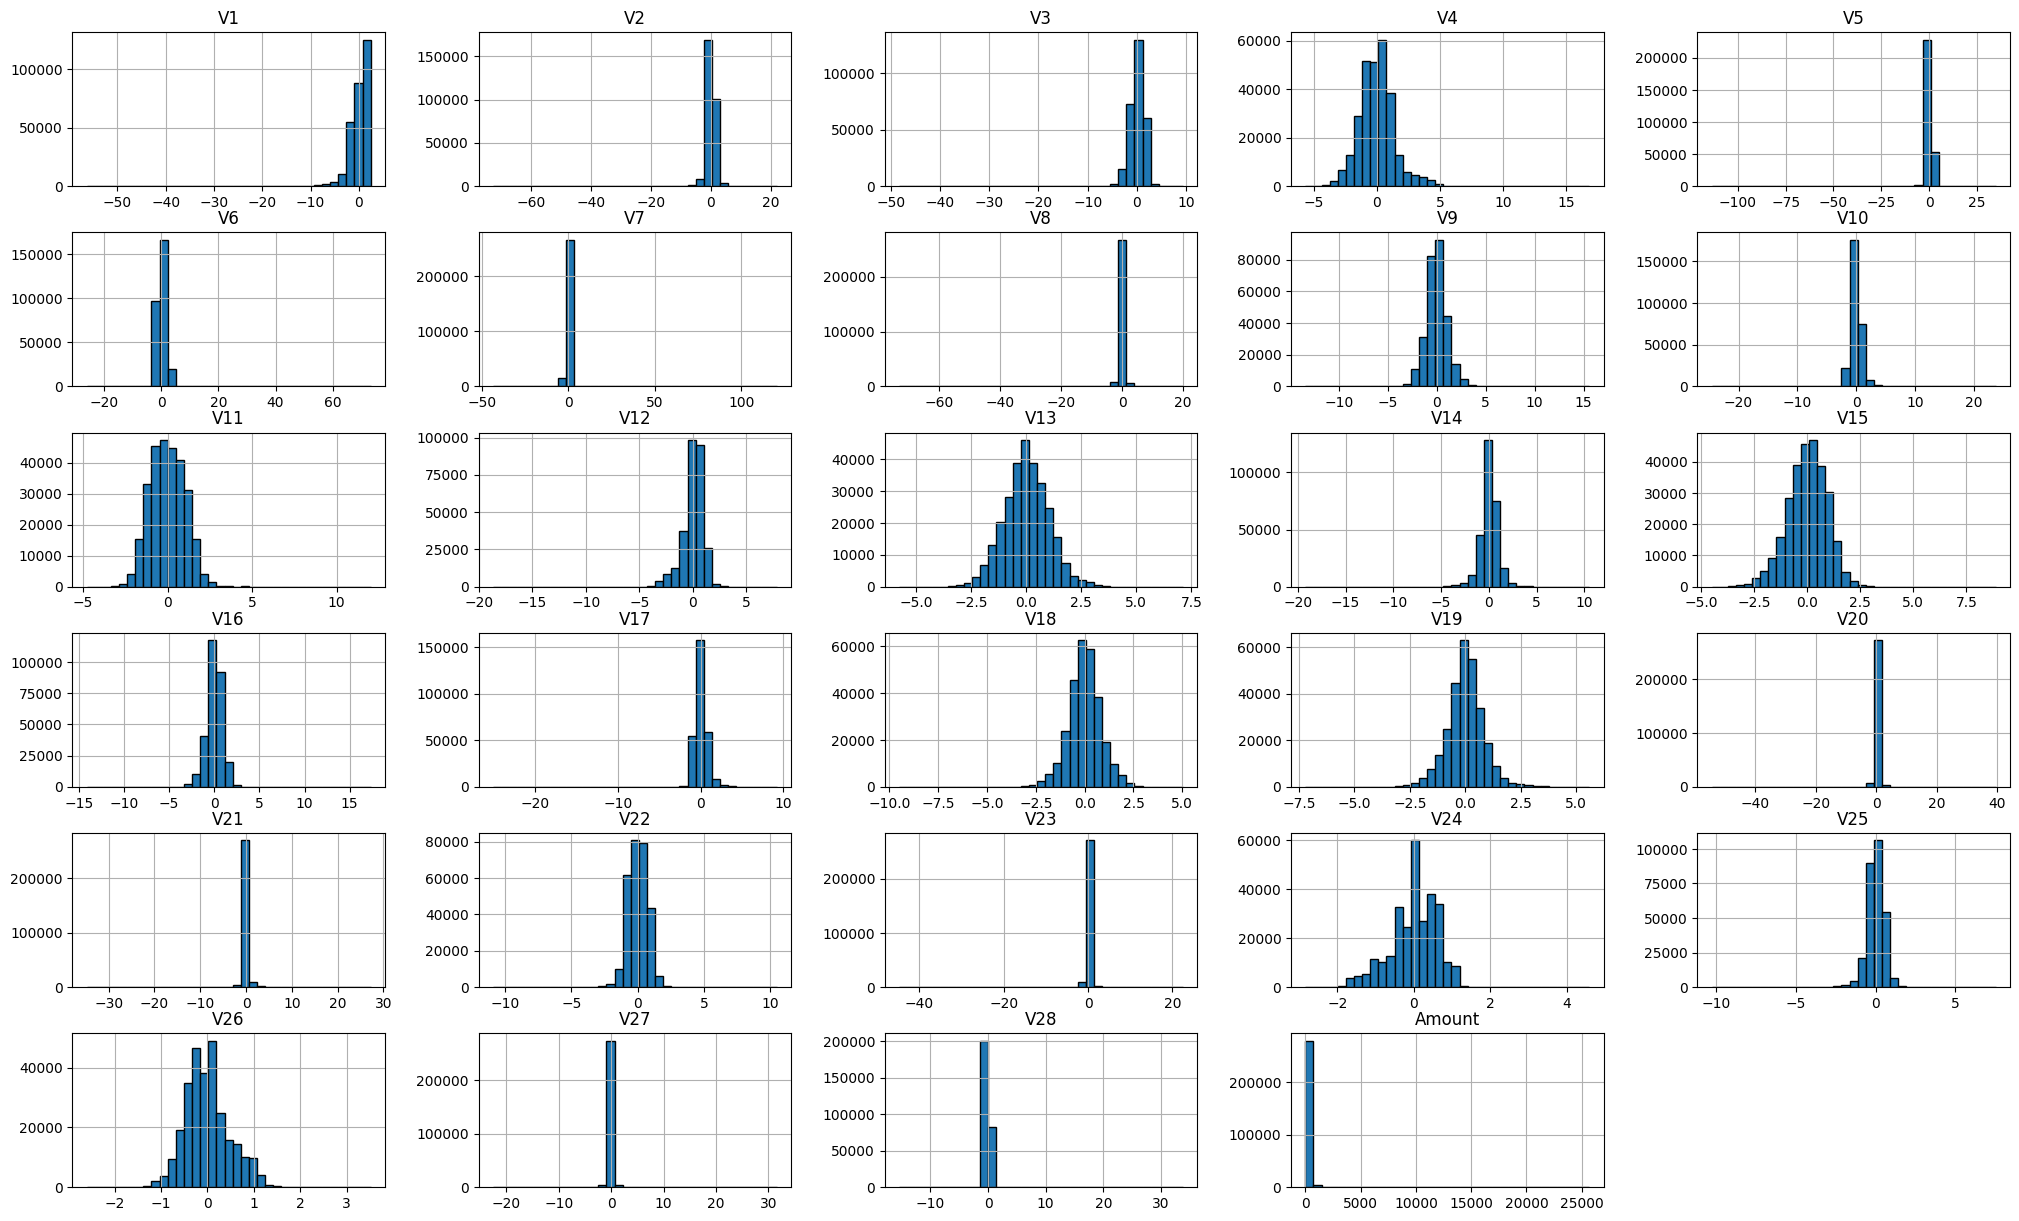

In [ ]:
#Visualize feature distribution

x.hist(figsize=(25, 15), bins=35, edgecolor='black')
plt.show()

**The Histogram** shows 25 histograms for variables V1 to V28 and Amount, indicating mostly non-normal distributions with varying skewness.

---



In [ ]:
#Left Skewed
# x[["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28"]]

# #Right Skewed
# x[[ "V5", "V10", "V12", "V18", "V25","Amount"]]

# cols = ["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28","V5", "V10", "V12", "V18", "V25", "Amount"]

# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson') #yeo-johnson ← A safe method to transform negative and positive values ​​to be closer to a normal distribution.
# x[cols] = pt.fit_transform(x[cols])

##**Highly imbalanced**

Class
0    284315
1       492
Name: count, dtype: int64


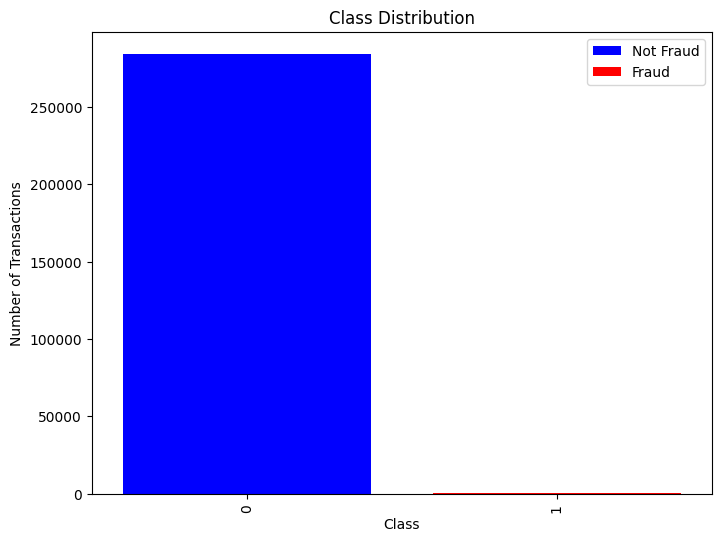

In [ ]:
Label_counts = y.value_counts()

print(Label_counts)

plt.figure(figsize=(8, 6))
bars = plt.bar(Label_counts.index, Label_counts.values, color=['blue', 'red'])

Label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(bars , ['Not Fraud' , 'Fraud'])
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

Class
0    492
1    492
Name: count, dtype: int64


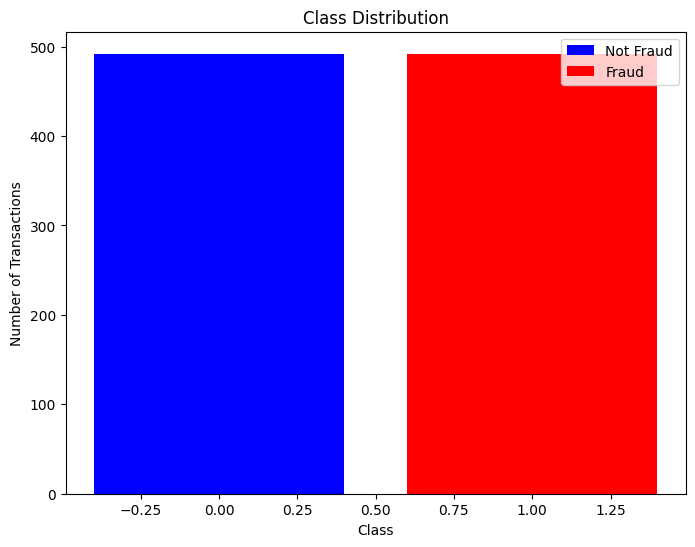

In [ ]:
#By using RandomUnderSampler, you are creating a new dataset where the number of instances in the fraud and non-fraud classes is equal,
#which can lead to better model performance when dealing with this type of imbalance.
Balanced_Label_counts = y_resampled.value_counts()

print(Balanced_Label_counts)

plt.figure(figsize=(8, 6))
bars = plt.bar(Balanced_Label_counts.index, Balanced_Label_counts.values, color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(bars , ['Not Fraud' , 'Fraud'])
plt.show()

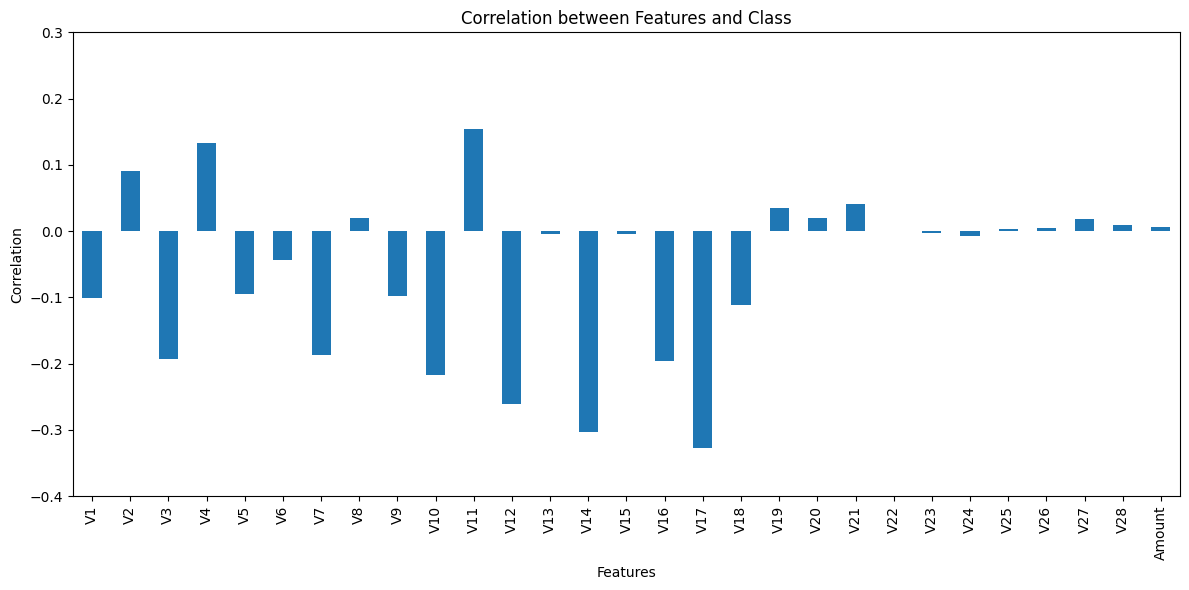

In [ ]:
correlation_matrix = x.corrwith(y)
plt.figure(figsize=(12, 6))
correlation_matrix.plot(kind='bar')
plt.title('Correlation between Features and Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks()
plt.ylim(-0.4, 0.3)
plt.tight_layout()
plt.show()



```
```

##**Feature Creation**

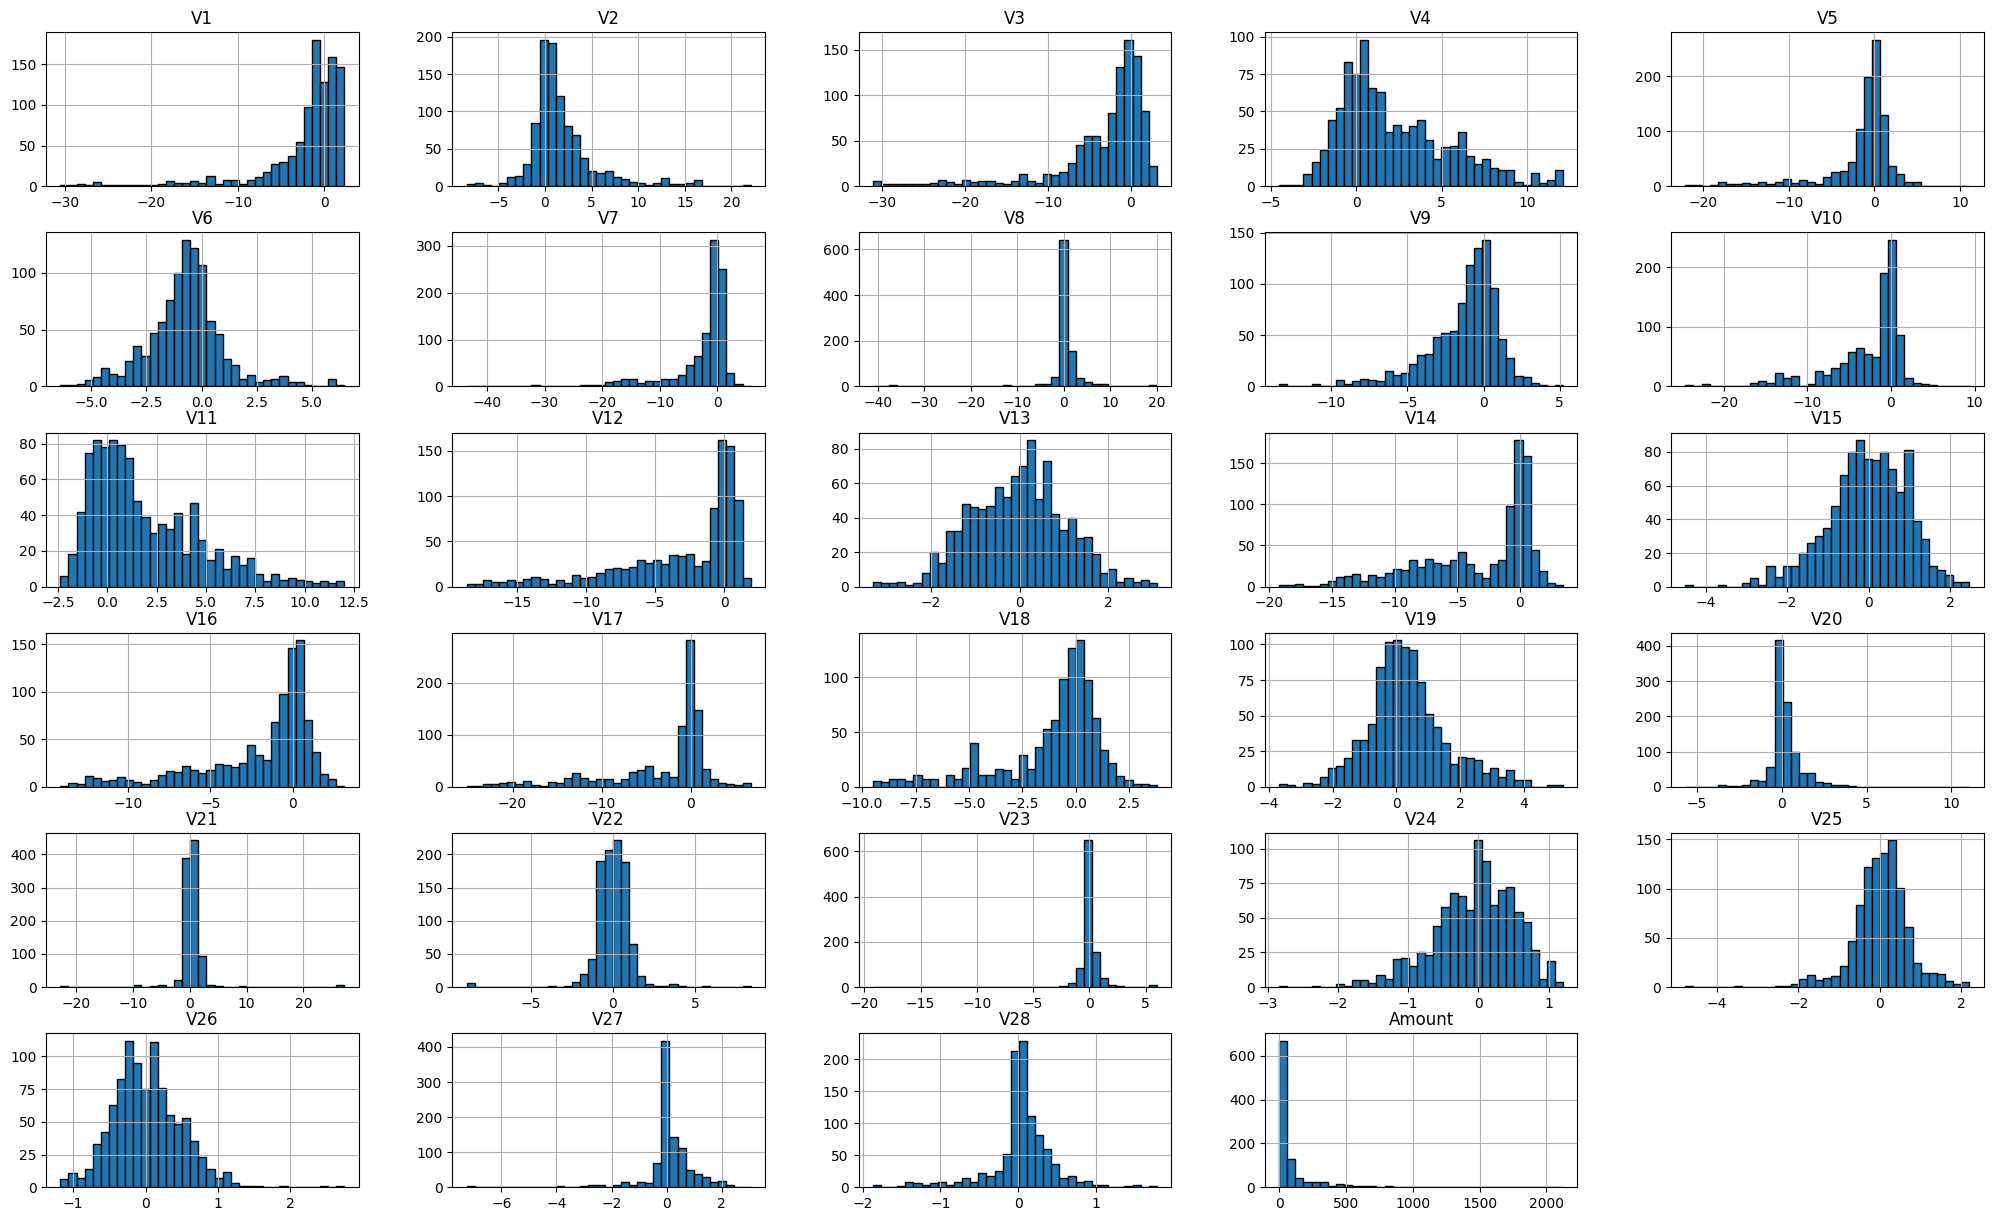

In [ ]:
x_resampled.hist(figsize=(25, 15), bins=35, edgecolor='black')
plt.show()

In [ ]:
correlation_matrix=x_resampled.corr().round(6)

**Heatmap for the correlation between matricies**

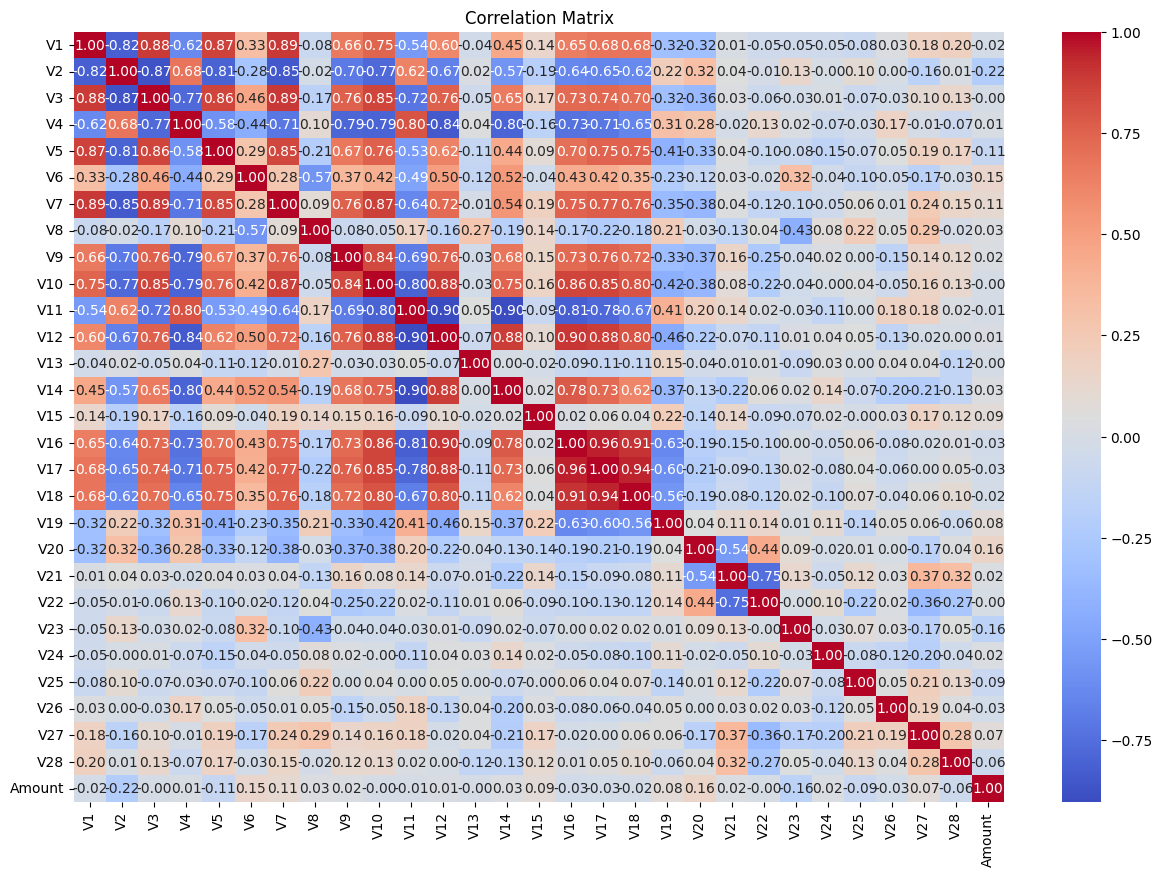

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
x_resampled["v16+v17"]=x_resampled["V16"]+x_resampled["V17"]
x_resampled["v17+v18"]=x_resampled["V17"]+x_resampled["V18"]
#x_resampled["v16*v17"]=x_resampled["V16"]*x_resampled["V17"]
#x_resampled["v17+v18"]=x_resampled["V17"]*x_resampled["V18"]
x_resampled["v16+v18"]=x_resampled["V16"]+x_resampled["V18"]
x_resampled["v11+v12"]=x_resampled["V11"]+x_resampled["V12"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_resampled[["Amount","v16+v18","v16+v17","v17+v18","v11+v12"]] = scaler.fit_transform(x_resampled[["Amount","v16+v18","v16+v17","v17+v18","v11+v12"]])


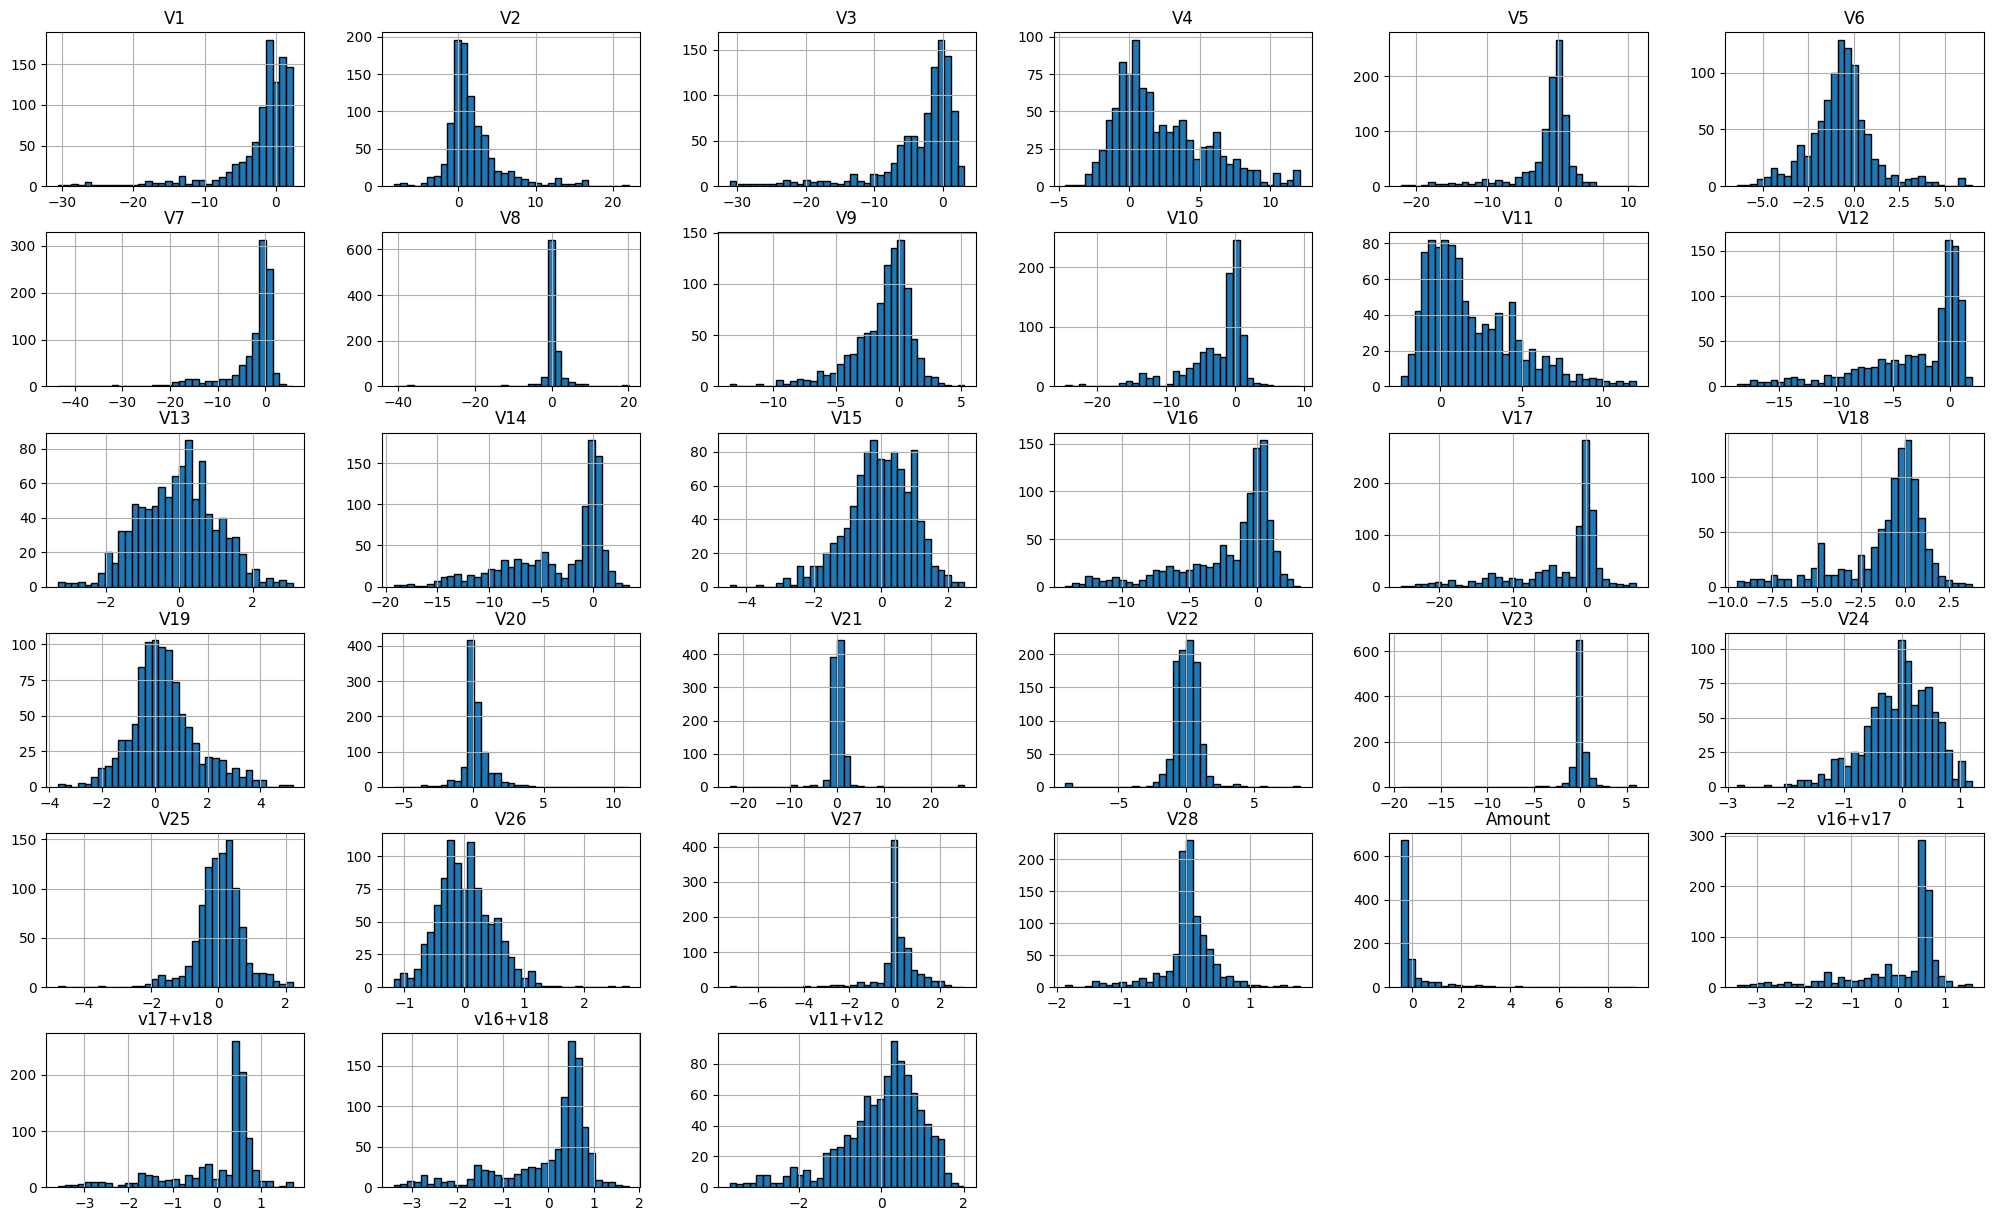

In [ ]:
x_resampled.hist(figsize=(25, 15), bins=35, edgecolor='black')
plt.show()

#Dimensionality reduction (PCA, t-SNE)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
x_pca = pca.fit_transform(x_resampled)

In [ ]:
# Analyze explained variance
explained_variance = pca.explained_variance_ratio_.round(3)
explained_variance

array([0.68 , 0.099, 0.073, 0.037, 0.032, 0.011, 0.008, 0.008, 0.007,
       0.006, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

 The first principal component explains the largest amount of variance, about 61.3%. This means most of the important information in the data is captured by the first component. The remaining components explain less variance, with the second and third contributing 11.3% and 7.7% respectively.

---




**explained variance**  --> It helps me determine how many principal components I need to retain in order to preserve most of the information from the original dataset, while reducing the dimensionality without significant loss of important data.



In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(x_resampled)

the minimum number of components preserving 90–95% variance: 9


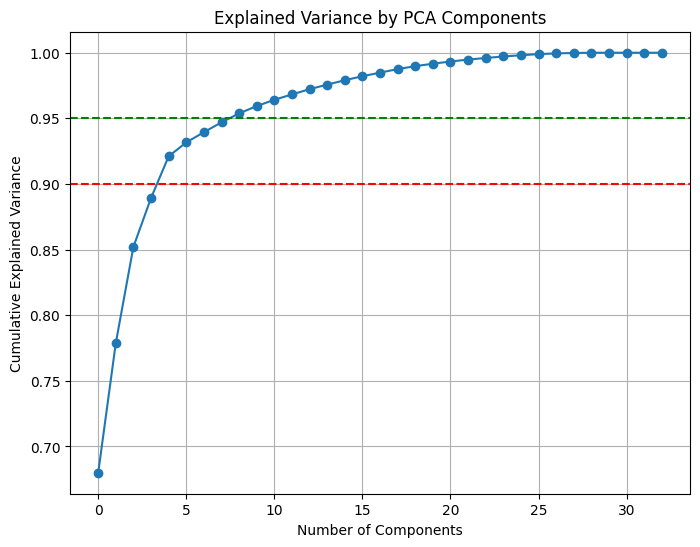

In [ ]:
# cv = cumulative_variance
cv = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cv, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

To preserve 95% of the total variance in the dataset, 16 principal components are required. This indicates that the original high-dimensional data can be reduced to just 16 components while still retaining most of its essential information and structure.

---





In [ ]:
pca_reduced = PCA(n_components=n_components,random_state=42)
x_pca_reduced = pca_reduced.fit_transform(x_resampled)
x_pca_reduced.shape

(984, 9)

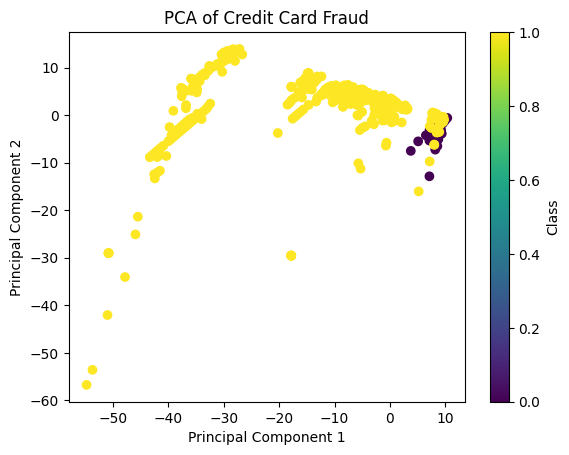

In [ ]:
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y_resampled)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Credit Card Fraud')
plt.colorbar(label='Class')
plt.show()

##TSNE

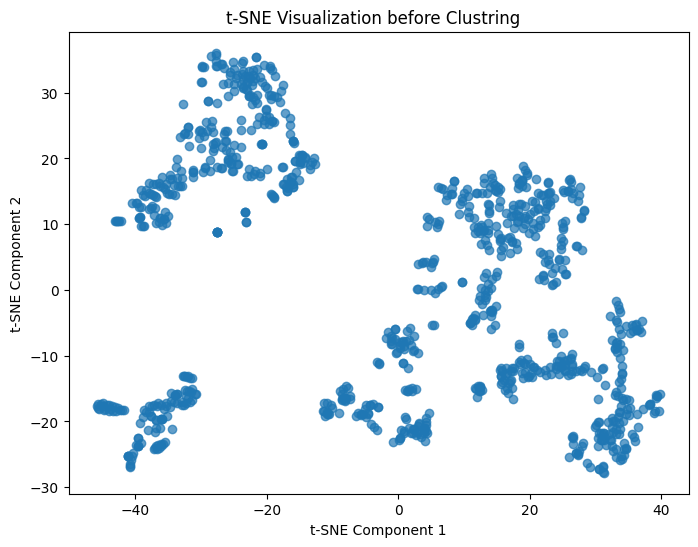

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE( random_state=42)
X_tsne = tsne.fit_transform(x_pca_reduced)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.7)
plt.title('t-SNE Visualization before Clustring  ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

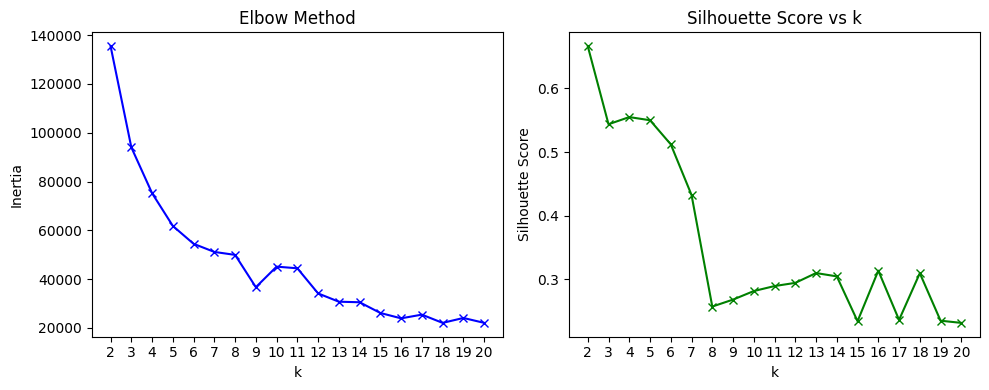

In [ ]:
inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    kmeans1 = KMeans(n_clusters=k,init='random', random_state=42)
    kmeans1.fit(x_pca_reduced)
    kmeans_per_k[k] = kmeans1
    inertias.append(kmeans1.inertia_)
    score = silhouette_score(x_pca_reduced, kmeans1.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

**Visualizing Silhouette Scores for K-Means Clustering**

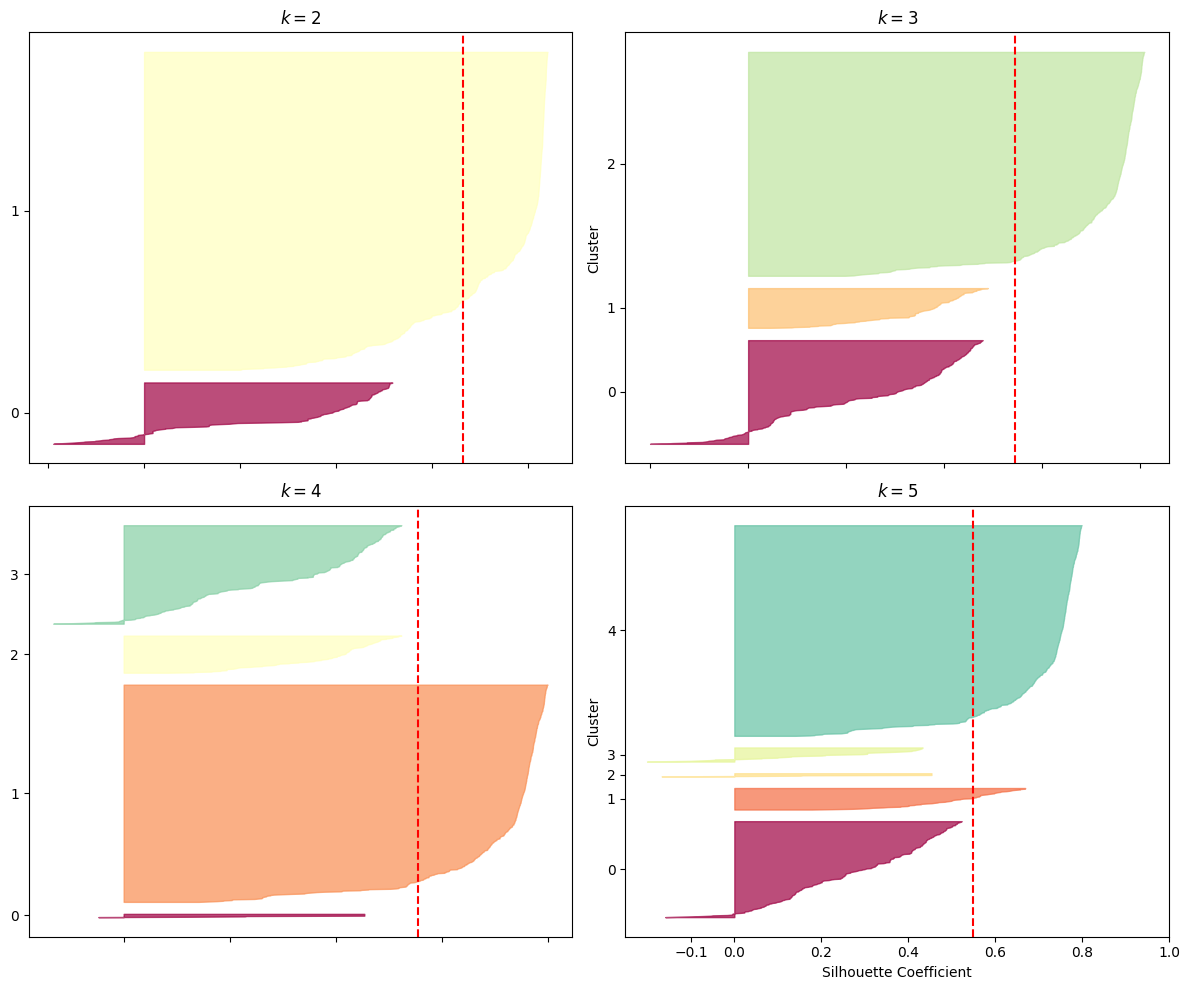

In [ ]:
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(12, 10))

for i, k in enumerate((2, 3, 4 , 5 )):
    plt.subplot(2, 2, i + 1)

    model = kmeans_per_k[k]
    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(x_pca_reduced, y_pred)

    padding = len(x_pca_reduced) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.tight_layout()
plt.show()

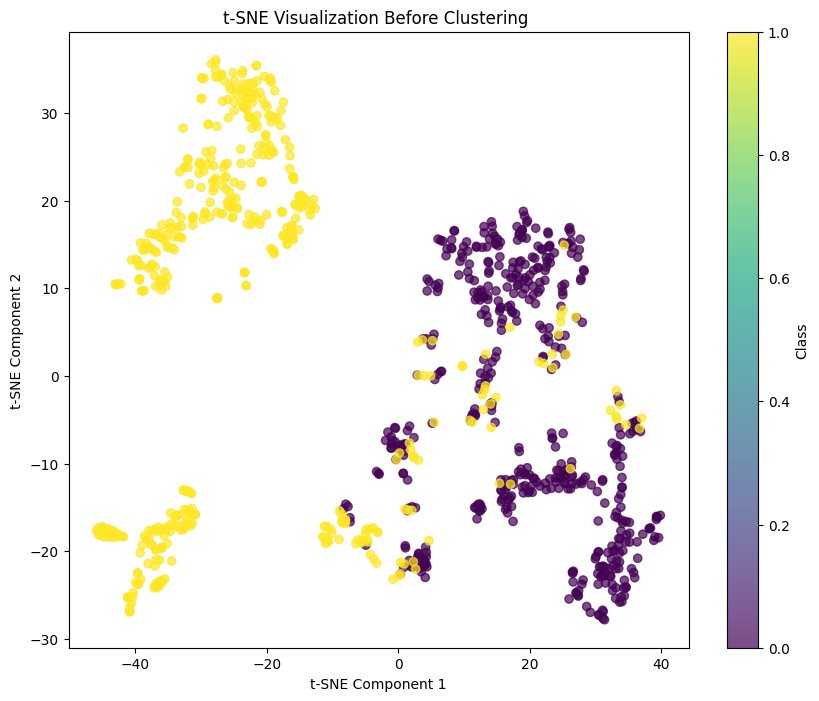

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_resampled, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization Before Clustering ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Class')
plt.show()

In [ ]:
kmeans_standerd = KMeans(n_clusters=2,n_init=20,init='random',  random_state=42).fit(x_pca_reduced)
clusters = kmeans_standerd.fit_predict(x_pca_reduced)



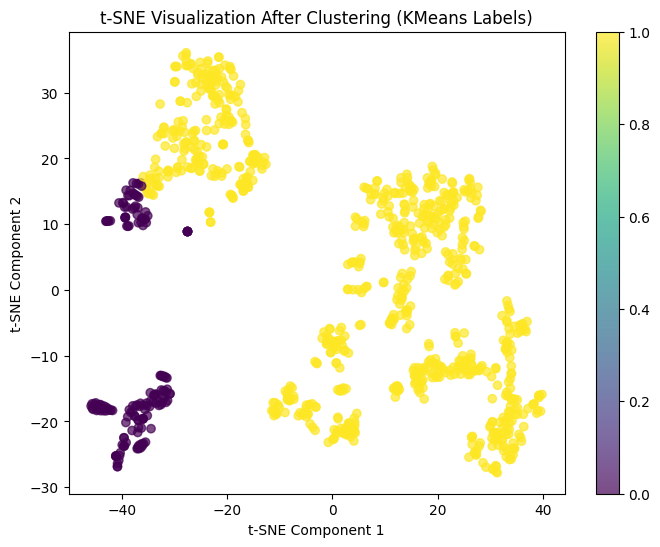

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization After Clustering (KMeans Labels)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

##kmeans ++

In [ ]:
kmeans_p = KMeans(n_clusters=2,init="k-means++" , random_state=42).fit(x_pca_reduced)
clusters1 = kmeans_p.fit_predict(x_pca_reduced)


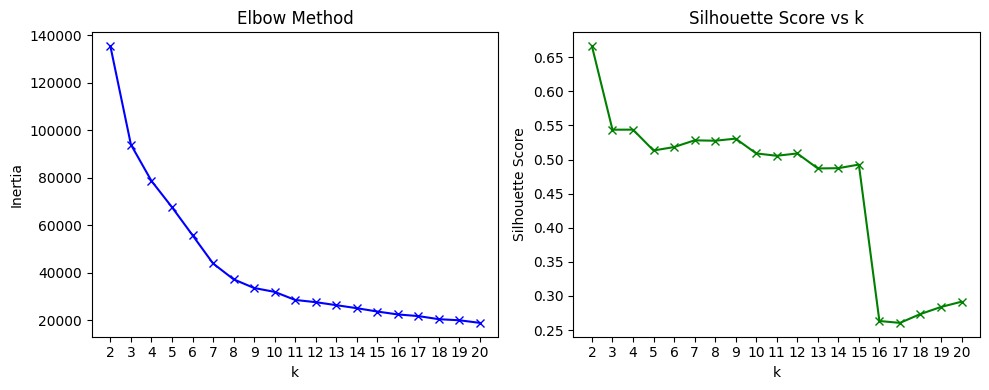

In [ ]:
inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    kmeans2 = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans2.fit(x_pca_reduced)
    kmeans_per_k[k] = kmeans2
    inertias.append(kmeans2.inertia_)
    score = silhouette_score(x_pca_reduced, kmeans2.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

**Compare standard K-Means standard and K-Means++.**

In [ ]:
#1
print("K-Means Iterations:", kmeans_standerd.n_iter_)
print("K-Means++ Iterations:", kmeans_p.n_iter_)
print("------------------------------------------------------------")

#2
print("K-Means Silhouette Score:", silhouette_score(x_pca_reduced, kmeans_standerd.labels_))
print("K-Means++ Silhouette Score:", silhouette_score(x_pca_reduced, kmeans_p.labels_))

K-Means Iterations: 9
K-Means++ Iterations: 4
------------------------------------------------------------
K-Means Silhouette Score: 0.6663139555198238
K-Means++ Silhouette Score: 0.6663139555198238


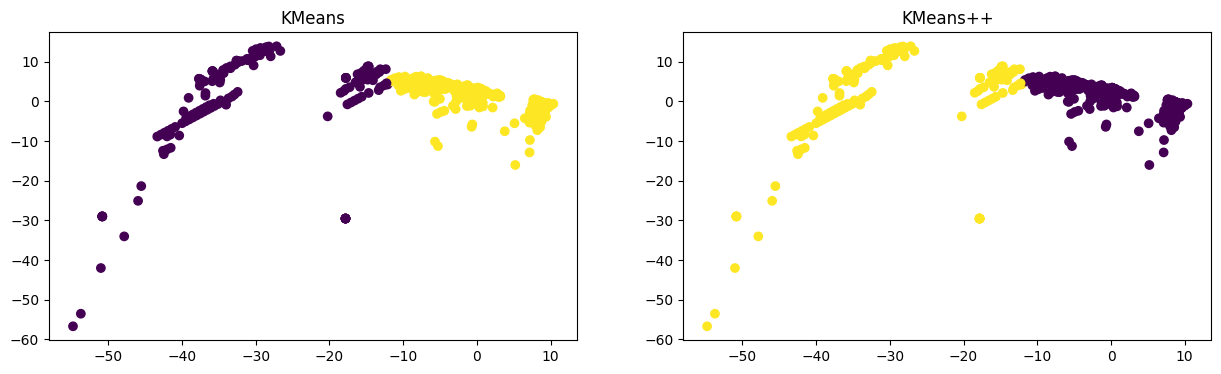

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
plt.show()

##MiniBatchKMeans

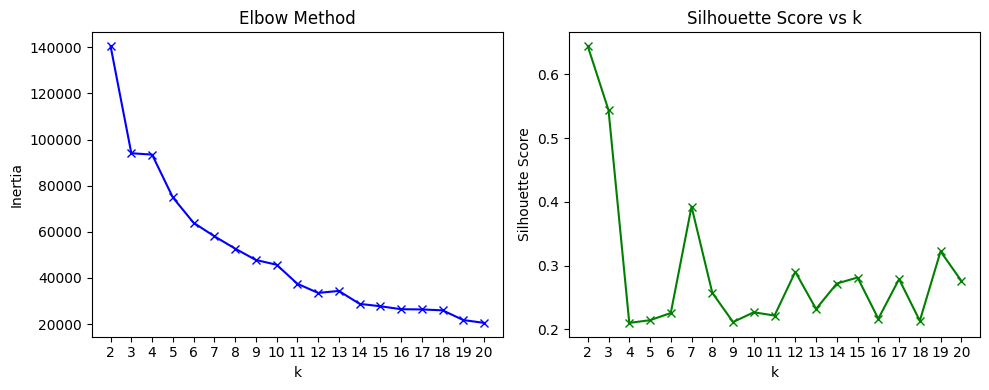

In [ ]:
inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca_reduced)
    kmeans_per_k[k] = kmeans
    inertias.append(kmeans.inertia_)
    score = silhouette_score(x_pca_reduced, kmeans.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minikmeans=MiniBatchKMeans(n_clusters=2, random_state=42)
minikmeans.fit(x_pca_reduced)

MiniBatchKMeans(n_clusters=2, random_state=42)

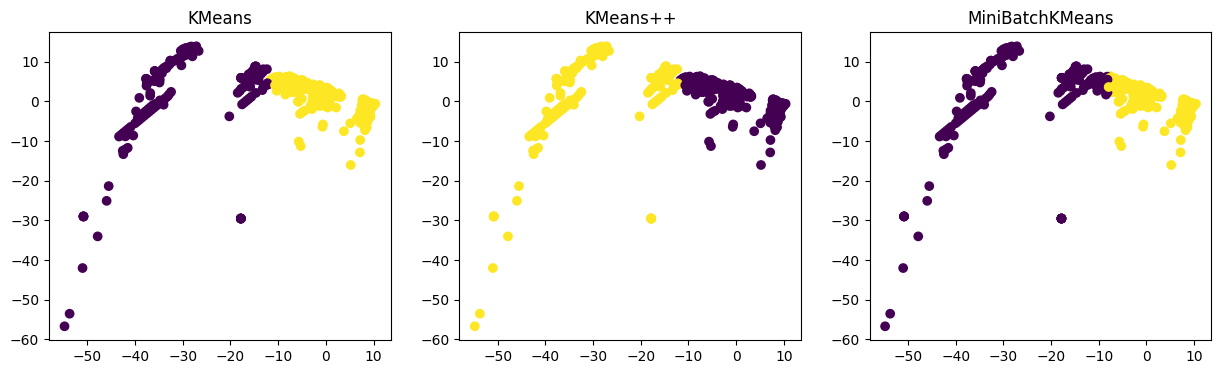

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()

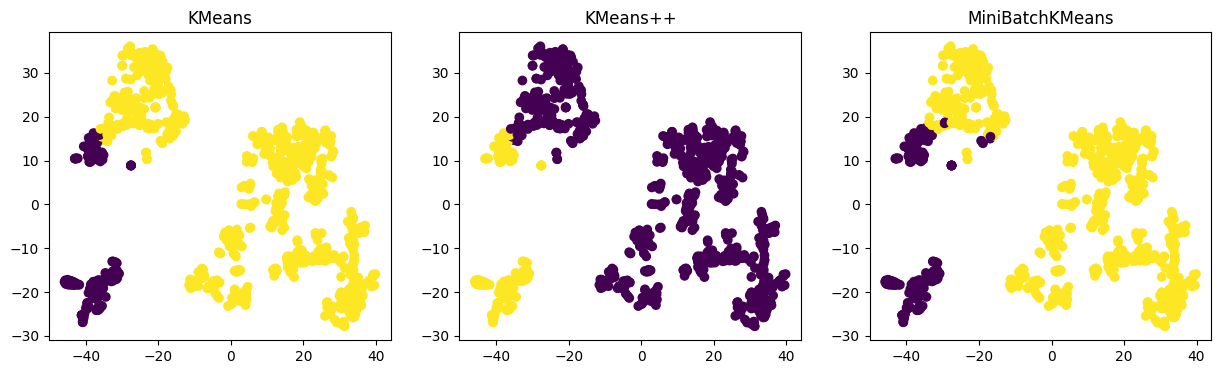

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()


In [ ]:
!pip install memory_profiler

In [ ]:
import time
start_time = time.time()
minikmeans=MiniBatchKMeans(n_clusters=2, random_state=42)
minikmeans.fit(x_pca_reduced)
end_time = time.time()
mini_batch_cluster_labels = minikmeans.labels_
mini_batch_time = end_time-start_time

mini_batch_silhouette = silhouette_score(x_pca_reduced, mini_batch_cluster_labels)

print("Mini-Batch K-Means:")
print(f"  Time taken: {mini_batch_time:.4f} seconds")
print(f"  Silhouette Score: {mini_batch_silhouette}")


start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_pca_reduced)
end_time = time.time()
kmeans_time = end_time - start_time

kmeans_silhouette = silhouette_score(x_pca_reduced, kmeans.labels_)

print("\nStandard K-Means:")
print(f"  Time taken: {kmeans_time:.4f} seconds")
print(f"  Silhouette Score: {kmeans_silhouette}")


print("\nComparison:")
print(f"  Time difference: {mini_batch_time - kmeans_time:.4f} seconds")
print(f"  Silhouette difference: {mini_batch_silhouette - kmeans_silhouette:.4f}")


Mini-Batch K-Means:
  Time taken: 0.0120 seconds
  Silhouette Score: 0.6439016541392862

Standard K-Means:
  Time taken: 0.0035 seconds
  Silhouette Score: 0.6663139555198238

Comparison:
  Time difference: 0.0085 seconds
  Silhouette difference: -0.0224


In [ ]:

from memory_profiler import memory_usage

def kmeans():
    kmeans = KMeans(n_clusters=4 , random_state=42)
    kmeans.fit(x_pca_reduced)

def kmeans_minibatch():
    minikmeans=MiniBatchKMeans(n_clusters=4, random_state=42)
    minikmeans.fit(x_pca_reduced)

mem_standerd = memory_usage(kmeans)
mem_mini = memory_usage(kmeans_minibatch)

print("standerd Memory Usage:", max(mem_standerd), "MiB")
print("mini_batch  Memory Usage:", max(mem_mini), "MiB")

standerd Memory Usage: 1561.6953125 MiB
mini_batch  Memory Usage: 1561.765625 MiB


 **Note:**

1.   The memory usage appears similar for both KMeans and MiniBatchKMeans.



2.   This is likely because the dataset is relatively small, and PCA has already reduced its dimensions.





3.   MiniBatchKMeans shows clear memory and speed advantages mainly with large-scale data.



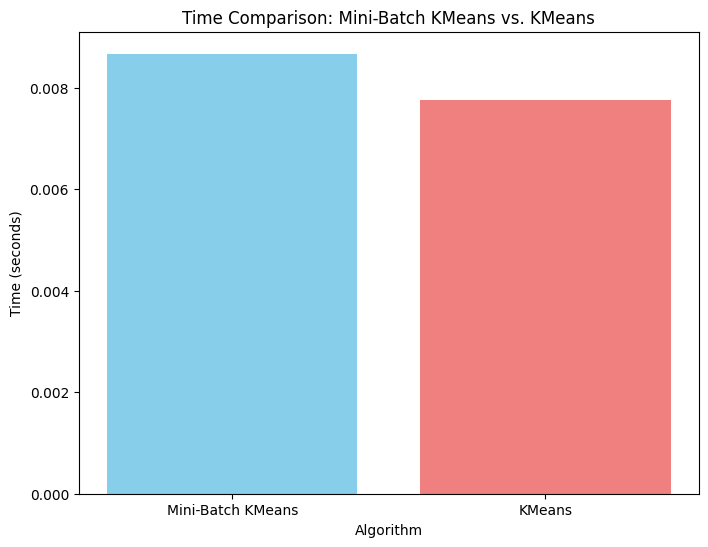

In [ ]:
algorithms = ['Mini-Batch KMeans', 'KMeans']
times = [mini_batch_time, kmeans_time]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times, color=['skyblue', 'lightcoral'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison: Mini-Batch KMeans vs. KMeans')
plt.show()

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
labels = dbscan.fit_predict(x_pca_reduced)
label_counts = pd.Series(labels).value_counts().sort_index()

print(label_counts)

-1     799
 0      72
 1       5
 2      58
 3       9
 4       5
 5       7
 6       6
 7       5
 8       5
 9       7
 10      6
Name: count, dtype: int64


In [ ]:

# epsilon = np.linspace(0.01,1, 20)
# min_samples = np.arange(2,25, step = 2)
# import itertools
# combinations = list(itertools.product(epsilon,min_samples))
# N= len(combinations)
# N

240

In [ ]:
# import itertools

# def Gridsearch(combinations, X):
#     scores = []
#     all_label = []

#     for i, (eps, num_samples) in enumerate(combinations):
#         dbscan_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
#         labels = dbscan_model.labels_
#         labels_set = set(labels)
#         num_clusters = len(labels_set) - (1 if -1 in labels_set else 0)

#         if (num_clusters < 2) or (num_clusters > 25):
#             scores.append(-1)
#             all_label.append("Poor")
#             print(f"at iteration : {i}, eps = {eps}, min_samples = {num_samples}, number of clusters = {num_clusters}, moving on ...")
#             continue

#         scores.append(silhouette_score(X, labels))
#         all_label.append(labels)
#         print(f"at iteration : {i}, score = {scores[-1]}, Number of clusters : {num_clusters}")

#     if not scores or all(score == -1 for score in scores):
#          return {
#             'best_epsilon': None,
#             'best_min_samples': None,
#             'best_labels': None,
#             'best_score': -1
#         }

#     best_index = np.argmax(scores)
#     best_parameters = combinations[best_index]
#     best_labels = all_label[best_index]
#     best_score = scores[best_index]

#     return {
#         'best_epsilon': best_parameters[0],
#         'best_min_samples': best_parameters[1],
#         'best_labels': best_labels,
#         'best_score': best_score
#     }

# epsilon = np.linspace(0.1, 3, 20)
# min_samples = np.arange(2, 25, step=2)
# combinations = list(itertools.product(epsilon, min_samples))

# result = Gridsearch(combinations, x_pca_reduced)

# print(f"Best eps: {result['best_epsilon']}")
# print(f"Best min_samples: {result['best_min_samples']}")
# print(f"Best score: {result['best_score']}")


at iteration : 0, eps = 0.1, min_samples = 2, number of clusters = 28, moving on ...
at iteration : 1, score = 0.6549590198175288, Number of clusters : 2
at iteration : 2, eps = 0.1, min_samples = 6, number of clusters = 1, moving on ...
at iteration : 3, eps = 0.1, min_samples = 8, number of clusters = 0, moving on ...
at iteration : 4, eps = 0.1, min_samples = 10, number of clusters = 0, moving on ...
at iteration : 5, eps = 0.1, min_samples = 12, number of clusters = 0, moving on ...
at iteration : 6, eps = 0.1, min_samples = 14, number of clusters = 0, moving on ...
at iteration : 7, eps = 0.1, min_samples = 16, number of clusters = 0, moving on ...
at iteration : 8, eps = 0.1, min_samples = 18, number of clusters = 0, moving on ...
at iteration : 9, eps = 0.1, min_samples = 20, number of clusters = 0, moving on ...
at iteration : 10, eps = 0.1, min_samples = 22, number of clusters = 0, moving on ...
at iteration : 11, eps = 0.1, min_samples = 24, number of clusters = 0, moving on 

In [ ]:
# from sklearn.model_selection import GridSearchCV



# def silhouette_scorer(estimator, Mall_data):
#     labels = estimator.fit_predict(Mall_data)
#     if len(set(labels)) > 1 and -1 not in set(labels):
#         return silhouette_score(Mall_data, labels)
#     else:
#         return -1

# dbscan_grid={'eps': [0.1,0.3,0.5,0.7,0.9,2,3,4,5,6,7,],
#     'min_samples':[15,10,5,7,4]}

# dbscanSearch=GridSearchCV(DBSCAN() , dbscan_grid , scoring=silhouette_scorer)

# dbscanSearch.fit(x_pca_reduced)
# print(dbscanSearch.best_params_)
# print(dbscanSearch.best_score_)

{'eps': 0.1, 'min_samples': 15}
-1.0


In [ ]:
best_dbscan = DBSCAN(eps=6, min_samples=10)
labels = best_dbscan.fit_predict(x_pca_reduced)
label_counts = pd.Series(labels).value_counts().sort_index()
print(label_counts)

-1    111
 0    582
 1    254
 2     37
Name: count, dtype: int64


In [ ]:
silhouette = silhouette_score(x_pca_reduced, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.4952139802943937


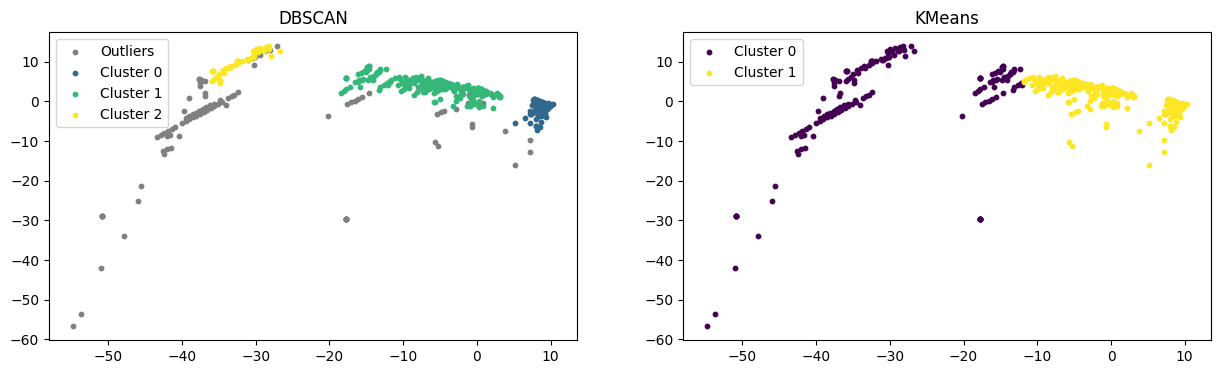

In [ ]:


fig, axs = plt.subplots(1, 2, figsize=(15, 4))

unique_db_labels = np.unique(best_dbscan.labels_)
colors_db = plt.cm.viridis(np.linspace(0, 1, len(unique_db_labels)))

for i, label in enumerate(unique_db_labels):
    mask = (best_dbscan.labels_ == label)
    if label == -1:
        axs[0].scatter(x_pca_reduced[mask, 0], x_pca_reduced[mask, 1], c='gray', label='Outliers', s=10)
    else:
        axs[0].scatter(x_pca_reduced[mask, 0], x_pca_reduced[mask, 1], c=[colors_db[i]], label=f'Cluster {label}', s=10)

axs[0].set_title("DBSCAN")
axs[0].legend(loc='best')
unique_km_labels = np.unique(kmeans_standerd.labels_)
colors_km = plt.cm.viridis(np.linspace(0, 1, len(unique_km_labels)))

for i, label in enumerate(unique_km_labels):
    mask = (kmeans_standerd.labels_ == label)
    axs[1].scatter(x_pca_reduced[mask, 0], x_pca_reduced[mask, 1], c=[colors_km[i]], label=f'Cluster {label}', s=10)

axs[1].set_title("KMeans")
axs[1].legend(loc='best')

plt.show()

##Anomaly detection

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
forest.fit(x_resampled)
forest_predict = forest.predict(x_resampled)
forest_labels = np.where(forest_predict == -1, 1, 0)

In [ ]:
svm = OneClassSVM(gamma='auto', nu=0.1)
svm.fit(x_resampled)
svm_predict = svm.predict(x_resampled)
svm_labels = np.where(svm_predict == -1, 1, 0)

In [ ]:
conf_forest = confusion_matrix(y_resampled, forest_labels)
print("\nIsolation Forest:\n",conf_forest )
conf_svm = confusion_matrix(y_resampled, svm_labels)
print("Confusion Matrix:\n",conf_svm )


Isolation Forest:
 [[490   2]
 [370 122]]
Confusion Matrix:
 [[463  29]
 [365 127]]


In [ ]:
forest_precision = precision_score(y_resampled, forest_labels)
forest_recall = recall_score(y_resampled, forest_labels)
forest_f1 = f1_score(y_resampled, forest_labels)
print(f"Precision: {forest_precision:.4f}")
print(f"Recall: {forest_recall:.4f}")
print(f"F1-Score: {forest_f1:.4f}")

Precision: 0.9839
Recall: 0.2480
F1-Score: 0.3961


In [ ]:
svm_precision = precision_score(y_resampled, svm_labels)
svm_recall = recall_score(y_resampled, svm_labels)
svm_f1 = f1_score(y_resampled, svm_labels)
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")

Precision: 0.8141
Recall: 0.2581
F1-Score: 0.3920


In [ ]:
if forest_f1 > svm_f1:
    better_model = "Isolation Forest"
    better_score = forest_f1
    worse_model = "One-Class SVM"
    worse_score = svm_f1
elif svm_f1 > forest_f1:
     better_model = "One-Class SVM"
     better_score = svm_f1
     worse_model = "Isolation Forest"
     worse_score = forest_f1
else:
    better_model = "Neither"
    better_score = forest_f1

print(f"Based on the F1-Score : {better_model} performs better (F1 = {better_score:.4f}) compared to {worse_model} (F1 = {worse_score:.4f}).")
print("Looking at other metrics:")
print(f"Isolation Forest: Precision={forest_precision:.4f}, Recall={forest_recall:.4f}")
print(f"One-Class SVM: Precision={svm_precision:.4f}, Recall={svm_recall:.4f}")

Based on the F1-Score : Isolation Forest performs better (F1 = 0.3961) compared to One-Class SVM (F1 = 0.3920).
Looking at other metrics:
Isolation Forest: Precision=0.9839, Recall=0.2480
One-Class SVM: Precision=0.8141, Recall=0.2581


In [ ]:
print("\nReasons for performance difference")
print("- Isolation Forest works by randomly partitioning data points and measuring how 'isolated' they are. It's often effective in high-dimensional spaces and less sensitive to the density of the data compared to density-based methods.")
print("- One-Class SVM tries to find a hyperplane that separates the training data from the origin (or other data). Its performance can be sensitive to the kernel choice and the 'nu' parameter, which controls the trade-off between finding a tight boundary and allowing some training errors.")
print("- Since the models were trained on *resampled* data, they learned the 'normal' pattern from a balanced distribution. This might favor one algorithm over the other depending on how they handle the learned distribution and then detect deviations.")
print("- Isolation Forest might be better at spotting individual outliers even in a balanced dataset, while One-Class SVM might be more focused on defining a compact region for the 'normal' class.")
print("- The performance heavily depends on how well the anomalies (fraud) are truly separable outliers in the feature space used (the PCA reduced features of the resampled data).")

print("\nImportant Consideration:")
print("The evaluation was performed on the *resampled* dataset. A more robust evaluation for anomaly detection would typically involve training the unsupervised models on the *original* non-fraudulent data (or the full dataset with a carefully chosen contamination parameter) and then evaluating their performance on the *original* test set, which maintains the true class imbalance.")
print("The results here reflect performance in identifying anomalies within the modified distribution created by undersampling.")


Reasons for performance difference
- Isolation Forest works by randomly partitioning data points and measuring how 'isolated' they are. It's often effective in high-dimensional spaces and less sensitive to the density of the data compared to density-based methods.
- One-Class SVM tries to find a hyperplane that separates the training data from the origin (or other data). Its performance can be sensitive to the kernel choice and the 'nu' parameter, which controls the trade-off between finding a tight boundary and allowing some training errors.
- Since the models were trained on *resampled* data, they learned the 'normal' pattern from a balanced distribution. This might favor one algorithm over the other depending on how they handle the learned distribution and then detect deviations.
- Isolation Forest might be better at spotting individual outliers even in a balanced dataset, while One-Class SVM might be more focused on defining a compact region for the 'normal' class.
- The performan

#Compare clustering performance with and without dimensionality reduction (PCA).

In [ ]:
score1 = silhouette_score(x_pca_reduced, kmeans1.labels_)
score = silhouette_score(x_resampled, kmeans.labels_)
print("Silhouette Score with PCA:", score1)
print("Silhouette Score without PCA:", score)

Silhouette Score with PCA: 0.6663139555198238
Silhouette Score without PCA: 0.7677498220346365


In [ ]:

start_time1 = time.time()
kmeans1 = KMeans(init='random',n_clusters=2, random_state=42)
kmeans1.fit(x_pca_reduced)
end_time1 = time.time()
kmeans_time = end_time1 - start_time1


start_time = time.time()
kmeans = KMeans(init='random',n_clusters=2, random_state=42)
kmeans.fit(x_resampled)
end_time = time.time()
kmeans_time_without_pca = end_time - start_time


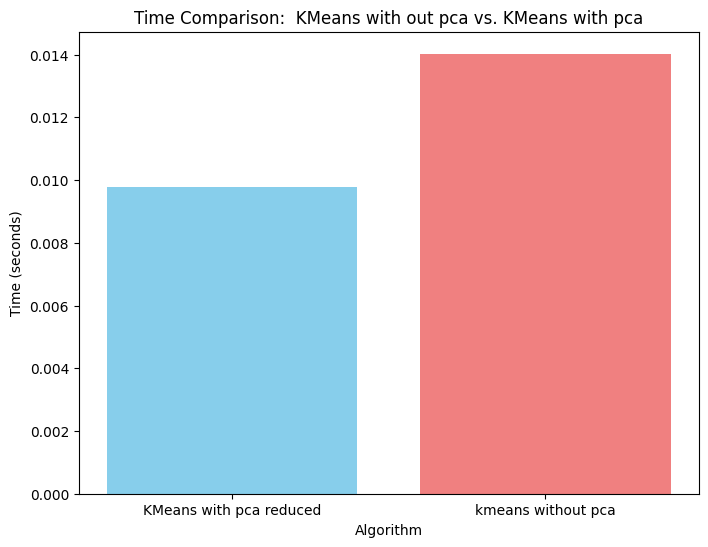

In [ ]:
algorithms = [ 'KMeans with pca reduced','kmeans without pca']
times = [kmeans_time_without_pca, kmeans_time]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times, color=['skyblue', 'lightcoral'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison:  KMeans with out pca vs. KMeans with pca')
plt.show()

In [ ]:
kmeans_inertia = kmeans_standerd.inertia_
minibatch_inertia = minikmeans.inertia_

kmeans_silhouette_score = silhouette_score(x_pca_reduced, kmeans_standerd.labels_)
minibatch_silhouette_score = silhouette_score(x_pca_reduced, minikmeans.labels_)

comparison_data = {
    'Metric': ['Inertia Value', 'Silhouette Score', 'Execution Time (seconds)', 'Number of Clusters Found'],
    'KMeans': [kmeans_inertia, kmeans_silhouette_score, kmeans_time, 'N/A'],
    'MiniBatchKMeans': [minibatch_inertia, minibatch_silhouette_score, mini_batch_time, 'N/A'],
    'DBSCAN': ['N/A', silhouette, 'N/A', label_counts]
}

comparison_table = pd.DataFrame(comparison_data)

print("Clustering Algorithm Comparison Table:")
print(comparison_table.to_markdown(index=False, floatfmt=".4f"))


Clustering Algorithm Comparison Table:
| Metric                   | KMeans               | MiniBatchKMeans      | DBSCAN                    |
|:-------------------------|:---------------------|:---------------------|:--------------------------|
| Inertia Value            | 135490.39553035115   | 140461.52288887894   | N/A                       |
| Silhouette Score         | 0.6663139555198238   | 0.6439016541392862   | 0.4952139802943937        |
| Execution Time (seconds) | 0.013533830642700195 | 0.012112617492675781 | N/A                       |
| Number of Clusters Found | N/A                  | N/A                  | -1    111                 |
|                          |                      |                      |  0    582                 |
|                          |                      |                      |  1    254                 |
|                          |                      |                      |  2     37                 |
|                          |      